In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load and Explore Data

In [50]:
df = pd.read_csv('data/netflix_movies_detailed_up_to_2025.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471


In [51]:
df.describe()

,show_id,release_year,rating,duration,popularity,vote_count,vote_average,budget,revenue
count,1.600000e+04,16000.000000,16000.000000,0.0,16000.000000,16000.000000,16000.000000,1.600000e+04,1.600000e+04
mean,5.266582e+05,2017.500000,5.956368,NaN,20.384728,718.656125,5.956368,8.766792e+06,2.446308e+07
std,3.794427e+05,4.609916,1.754741,NaN,68.610033,2080.198316,1.754741,2.912450e+07,1.116977e+08
min,1.890000e+02,2010.000000,0.000000,NaN,3.860000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2.257258e+05,2013.750000,5.600000,NaN,7.840750,53.000000,5.600000,0.000000e+00,0.000000e+00
50%,4.468170e+05,2017.500000,6.300000,NaN,10.913500,138.000000,6.300000,0.000000e+00,0.000000e+00
75%,7.739808e+05,2021.250000,6.923000,NaN,17.336500,422.000000,6.923000,2.200000e+06,1.654473e+06
max,1.440471e+06,2025.000000,10.000000,NaN,3876.006000,37119.000000,10.000000,4.600000e+08,2.799439e+09


In [52]:
df.shape

(16000, 18)

In [53]:
df.columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'genres',
 'language',
 'description',
 'popularity',
 'vote_count',
 'vote_average',
 'budget',
 'revenue']

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       16000 non-null  int64  
 1   type          16000 non-null  object 
 2   title         16000 non-null  object 
 3   director      15868 non-null  object 
 4   cast          15796 non-null  object 
 5   country       15534 non-null  object 
 6   date_added    16000 non-null  object 
 7   release_year  16000 non-null  int64  
 8   rating        16000 non-null  float64
 9   duration      0 non-null      float64
 10  genres        15893 non-null  object 
 11  language      16000 non-null  object 
 12  description   15868 non-null  object 
 13  popularity    16000 non-null  float64
 14  vote_count    16000 non-null  int64  
 15  vote_average  16000 non-null  float64
 16  budget        16000 non-null  int64  
 17  revenue       16000 non-null  int64  
dtypes: float64(4), int64(5), o

In [55]:
missing_data = df.isna().sum()
missing_percentage = missing_data / len(df) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percentage
}).sort_values(by='Missing Count', ascending=False)
missing_df[missing_df['Missing Count'] > 0]

,Missing Count,Percentage
duration,16000,100.00000
country,466,2.91250
cast,204,1.27500
director,132,0.82500
description,132,0.82500
genres,107,0.66875


#### Cleaning and Preparation

In [56]:
df_clean = df.copy()

In [57]:
# df.columns
if 'date_added' in df_clean.columns:
    df_clean['date_added'] = pd.to_datetime(df_clean['date_added'], errors='coerce')
    df_clean['year_added'] = df_clean['date_added'].dt.year
    df_clean['month_added'] = df_clean['date_added'].dt.month
    print("Processed date_added column")

Processed date_added column


In [58]:
if 'release_year' in df_clean.columns:
    df_clean['release_year'] = pd.to_numeric(df_clean['release_year'], errors='coerce')
    df_clean = df_clean[(df_clean['release_year'] >= 1900) & (df_clean['release_year'] <= 2025)]
    print("Cleaned release_year column")

Cleaned release_year column


In [59]:
# if 'duration' in df_clean.columns:
#     df_clean['duration_num'] = df_clean['duration'].str.extract('(\d+)').astype(float)
#     df_clean['duration_type'] = df_clean['duration'].str.extract('(min|Season)')
#     print("Processed duration column")

# All the duration columns are null

In [60]:
df_clean['country'].str.split(',')[0][0].strip()

'United States of America'

In [61]:
if 'country' in df_clean.columns:
    df_clean['primary_country'] = df_clean['country'].str.split(',')[0][0].strip()
    print("Processed country column")

Processed country column


In [62]:
if 'listed_in' in df_clean.columns:
    print("Processed genres column")
    df_clean['primary_genre'] = df_clean['listed_in'].str.split(',')[0].str.strip()


In [63]:
df_clean.to_csv('data/netflix_movies_detailed_up_to_2025_clean.csv', index=False)

#### Performing EDA

In [64]:
df = df_clean.copy()

In [65]:
df.columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'genres',
 'language',
 'description',
 'popularity',
 'vote_count',
 'vote_average',
 'budget',
 'revenue',
 'year_added',
 'month_added',
 'primary_country']

In [66]:
if 'type' in df.columns:
    print('Content Type Distribution:')
    type_counts = df['type'].value_counts()
    print(type_counts)
    print(f"Movies: {type_counts.get('Movie', 0) / len(df) * 100:.1f}")

Content Type Distribution:
type
Movie    16000
Name: count, dtype: int64
Movies: 100.0


In [67]:
if 'release_year' in df.columns:
    print('Release Year Statistics:')
    print(f"Oldest content: {df['release_year'].min()}")
    print(f"Newest content: {df['release_year'].max()}"
    "")
    print(f"Most common decade: {(df['release_year'] // 10 * 10).mode().iloc[0]}s")


Release Year Statistics:
Oldest content: 2010
Newest content: 2025
Most common decade: 2010s


In [68]:
if 'year_added' in df.columns:
    print('Content Addition by Year:')
    yearly_additions = df['year_added'].value_counts().sort_index()
    print(yearly_additions.tail(5))

Content Addition by Year:
year_added
2021    1000
2022    1000
2023    1000
2024    1000
2025    1000
Name: count, dtype: int64


In [69]:
if 'primary_country' in df.columns:
    print('Top Content-Producing Countries:')
    top_countries = df['primary_country'].value_counts().head(10)
    print(top_countries)

Top Content-Producing Countries:
primary_country
United States of America    16000
Name: count, dtype: int64


In [70]:
if 'primary_genre' in df.columns:
    print('Most Popular Genres:')
    top_genres = df['primary_genre'].value_counts().head(10)
    print(top_genres)

In [71]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'language',
       'description', 'popularity', 'vote_count', 'vote_average', 'budget',
       'revenue', 'year_added', 'month_added', 'primary_country'],
      dtype='object')

#### Advanced Analysis

In [72]:
if 'year_added' in df.columns and 'type' in df.columns:
    print("Analysis 1: Content Strategy Over Time")
    content_by_year_type = df.groupby(['year_added','type']).size().unstack(fill_value=0)
    print("How Netflix's movie vs TV show additions have changed:")
    if len(content_by_year_type) > 3:
        recent_years = content_by_year_type.tail(3)
        print(recent_years)

Analysis 1: Content Strategy Over Time
How Netflix's movie vs TV show additions have changed:
type        Movie
year_added       
2023         1000
2024         1000
2025         1000


In [73]:
if 'primary_country' in df.columns:
    print("Analysis 2: Geographic Content Distribution")
    us_content = len(df[df['primary_country'] == 'United Stated'])
    total_content = len(df)
    international_pct = (1 - us_content / total_content) * 100
    print(f"International content: {international_pct:.1f}%")
    print(f"US content: {100 - international_pct:.1f}%")

Analysis 2: Geographic Content Distribution
International content: 100.0%
US content: 0.0%


In [74]:
    if 'primary_genre' in df.columns and 'type' in df.columns:
        print("\n🎭 Analysis 3: Genre Preferences by Content Type")
        genre_by_type = df.groupby(['type', 'primary_genre']).size().unstack(fill_value=0)
        print("Top genres for each content type:")

        if 'Movie' in df['type'].values:
            movie_genres = df[df['type'] == 'Movie']['primary_genre'].value_counts().head(3)
            print("Top Movie Genres:", list(movie_genres.index))

        if 'TV Show' in df['type'].values:
            tv_genres = df[df['type'] == 'TV Show']['primary_genre'].value_counts().head(3)
            print("Top TV Genres:", list(tv_genres.index))

#### Creating Visualizations

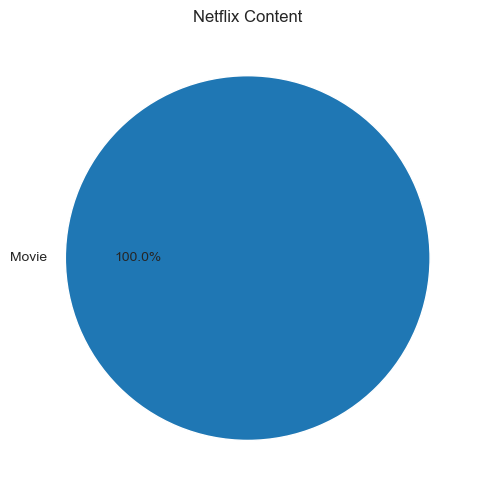

In [75]:
fig = plt.figure(figsize=(20, 16))

if 'type' in df.columns:
    plt.subplot(2, 3, 1)
    type_counts = df['type'].value_counts()
    plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%')
    plt.title('Netflix Content')

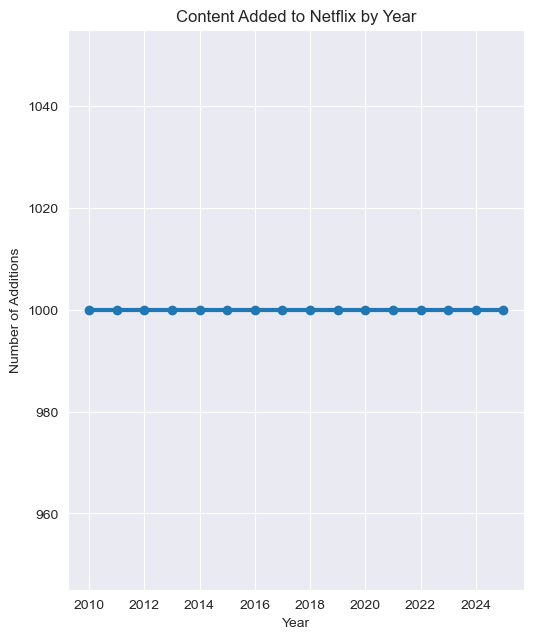

In [77]:
plt.figure(figsize=(20, 16))
if 'year_added' in df.columns:
    plt.subplot(2, 3, 2)
    yearly_additions = df['year_added'].value_counts().sort_index()
    plt.plot(yearly_additions.index, yearly_additions.values, marker='o', linewidth=3)
    plt.title('Content Added to Netflix by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Additions')

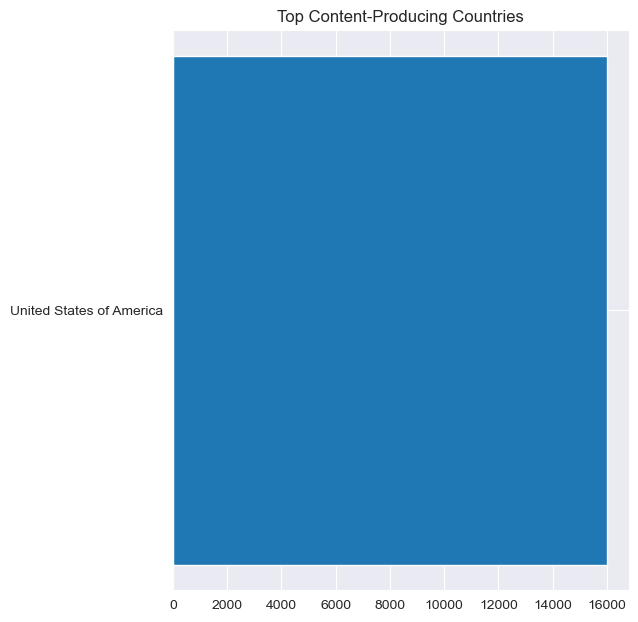

In [79]:
plt.figure(figsize=(20, 16))
if 'primary_country' in df.columns:
    plt.subplot(2, 3, 3)
    top_countries = df['primary_country'].value_counts().head(10)
    plt.barh(range(len(top_countries)), top_countries.values, align='center')
    plt.yticks(range(len(top_countries)), top_countries.index)
    plt.title('Top Content-Producing Countries')

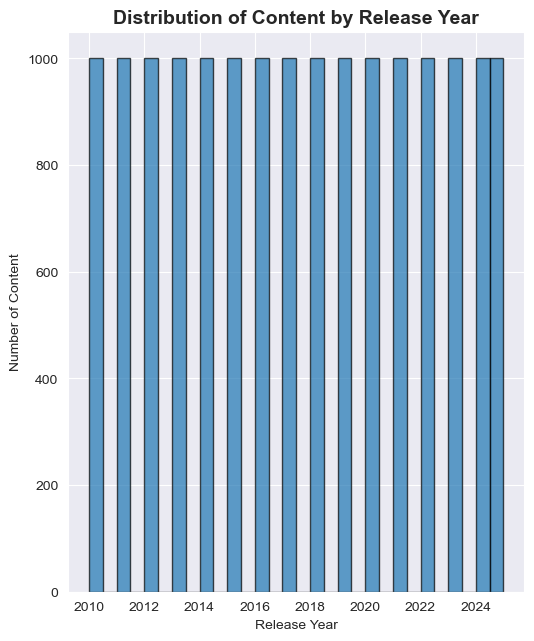

In [81]:
plt.figure(figsize=(20, 16))
if 'release_year' in df.columns:
    plt.subplot(2, 3, 4)
    plt.hist(df['release_year'], bins=30, alpha=0.7, edgecolor='black')
    plt.title('Distribution of Content by Release Year', fontsize=14, fontweight='bold')
    plt.xlabel('Release Year')
    plt.ylabel('Number of Content')

In [82]:
print("\n💡 STEP 6: KEY INSIGHTS & RECOMMENDATIONS")
    print("-" * 50)

    insights = []
    recommendations = []

    # Content mix insights
    if 'type' in df.columns:
        movie_pct = (df['type'] == 'Movie').mean() * 100
        if movie_pct > 60:
            insights.append(f"Movies dominate Netflix catalog ({movie_pct:.1f}%)")
            recommendations.append("Consider expanding TV show offerings for binge-watching audience")
        else:
            insights.append(f"Balanced content mix with {movie_pct:.1f}% movies")

    # Geographic diversity
    if 'primary_country' in df.columns:
        us_pct = (df['primary_country'] == 'United States').mean() * 100
        if us_pct > 50:
            insights.append(f"US-heavy content ({us_pct:.1f}%)")
            recommendations.append("Expand international content to serve global audience")
        else:
            insights.append(f"Strong international presence ({100 - us_pct:.1f}% non-US)")

    # Content freshness
    if 'release_year' in df.columns:
        recent_content = (df['release_year'] >= 2015).mean() * 100
        insights.append(f"{recent_content:.1f}% of content from 2015 or later")
        if recent_content < 60:
            recommendations.append("Focus on acquiring more recent content")

    # Print insights
    print("🔍 KEY INSIGHTS:")
    for i, insight in enumerate(insights, 1):
        print(f"{i}. {insight}")

    print("\n💼 BUSINESS RECOMMENDATIONS:")
    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec}")

IndentationError: unexpected indent (4052318657.py, line 2)